In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torchvision import transforms, datasets

# MNIST example from scratch

## Read files into numpy array and plot

['../../data/MNIST/original/train-labels-idx1-ubyte', '../../data/MNIST/original/t10k-images-idx3-ubyte', '../../data/MNIST/original/t10k-labels-idx1-ubyte', '../../data/MNIST/original/train-images-idx3-ubyte']
60000 labels with shape of (1,), Output shape: (60000, 1)
60000 images with shape of (28, 28), Output shape: (60000, 1, 28, 28)
10000 labels with shape of (1,), Output shape: (10000, 1)
10000 images with shape of (28, 28), Output shape: (10000, 1, 28, 28)


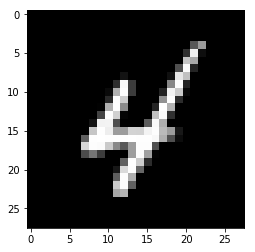

label: [4]


In [26]:
import glob
files = glob.glob("../../data/MNIST/original/**")
assert (len(files)==4), "4 Files are required"
print(files)

import struct
import numpy as np


def readImages(filePath):
    with open(filePath, 'rb') as f:
        struct.unpack('>i',f.read(4))[0]
        n_images = struct.unpack('>i',f.read(4))[0] 
        n_rows = struct.unpack('>i',f.read(4))[0]
        n_cols = struct.unpack('>i',f.read(4))[0]
        images = np.fromfile(f,dtype=np.uint8)
    assert (n_images==images.shape[0]/n_cols/n_rows), "Problem in reading the file. \
    The header of file does not match with its data"
    images = images.reshape(-1,1,n_rows,n_cols)
    print("{n_i} images with shape of {shape}, Output shape: {o_sh}".format(
        n_i = n_images, shape = (n_rows, n_cols), o_sh=images.shape))
    return images

def readLables(filePath):
    with open(filePath, 'rb') as f:
        struct.unpack('>i',f.read(4))[0]
        n_labels = struct.unpack('>i',f.read(4))[0] 
        labels = np.fromfile(f,dtype=np.uint8)
    assert (n_labels==labels.shape[0]), "Problem in reading the file. \
    The header of file does not match with its data"
    labels = labels.reshape(n_labels,-1)
    print("{n_i} labels with shape of {shape}, Output shape: {o_sh}".format(
        n_i = n_labels, shape = labels[0].shape, o_sh = labels.shape))
    return labels

train_labels=readLables(files[0])
train_images=readImages(files[3])
test_labels=readLables(files[2])
test_images=readImages(files[1])

idx = 15347
plt.imshow(train_images[idx,0,:,:],cmap='gray')
plt.show()
print ("label:" ,train_labels[idx])

In [10]:
print (train_images[idx,:,:,:].shape)

(1, 28, 28)


In [23]:
tr = transforms.Compose([transforms.ToTensor() ,
                         transforms.Normalize(([0.5]),([0.5]))])
# Transforms support only single images according to https://github.com/pytorch/vision/issues/157

In [22]:
out = tr(train_images[idx,:,:,:])
print(out.shape)

torch.Size([28, 1, 28])


In [16]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [19]:
print(type(trainset))

<class 'torchvision.datasets.mnist.MNIST'>


# Manual Dataset & DataLoader

In [39]:
from torch.utils.data import Dataset, DataLoader
class ManualMnistDataset(Dataset):
    """ Mnist Manual Dataset"""
    def __init__(self, imgsPath, labelPath, transform = None):
        def readImages(filePath):
            with open(filePath, 'rb') as f:
                struct.unpack('>i',f.read(4))[0]
                n_images = struct.unpack('>i',f.read(4))[0] 
                n_rows = struct.unpack('>i',f.read(4))[0]
                n_cols = struct.unpack('>i',f.read(4))[0]
                images = np.fromfile(f,dtype=np.uint8)
            assert (n_images==images.shape[0]/n_cols/n_rows), "Problem in reading the file. \
            The header of file does not match with its data"
            images = images.reshape(-1,1,n_rows,n_cols)
            print("{n_i} images with shape of {shape}, Output shape: {o_sh}".format(
                n_i = n_images, shape = (n_rows, n_cols), o_sh=images.shape))
            return images

        def readLables(filePath):
            with open(filePath, 'rb') as f:
                struct.unpack('>i',f.read(4))[0]
                n_labels = struct.unpack('>i',f.read(4))[0] 
                labels = np.fromfile(f,dtype=np.uint8)
            assert (n_labels==labels.shape[0]), "Problem in reading the file. \
            The header of file does not match with its data"
            labels = labels.reshape(n_labels,-1)
            print("{n_i} labels with shape of {shape}, Output shape: {o_sh}".format(
                n_i = n_labels, shape = labels[0].shape, o_sh = labels.shape))
            return labels
        
        self.imgsPath = imgsPath
        self.imgs = readImages(imgsPath)
        self.labelPath = labelPath
        self.labels = readLables(labelPath)
        self.transform = transform
        
    def __len__(self):
        return self.imgs.shape[0]
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        img = self.imgs[idx,:,:,:]
        
        sample = {'image': img, 'label': label}
        
        if self.transform:
            sample = self.transform(sample)
        return sample

60000 images with shape of (28, 28), Output shape: (60000, 1, 28, 28)
60000 labels with shape of (1,), Output shape: (60000, 1)


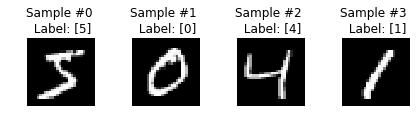

In [40]:
mnist = ManualMnistDataset(files[3],files[0])
fig = plt.figure()

for i in range(len(mnist)):
    sample = mnist[i]
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{} \n Label: {}'.format(i,sample['label']))
    ax.axis('off')
    plt.imshow(np.squeeze(sample['image']),cmap='gray')

    if i == 3:
        plt.show()
        break